<a href="https://colab.research.google.com/github/MariaDimopoulou/MovieGenreClassificationNLP/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt



Firstly, we read the csv file and we make a visualization of the count of each genre that appears in our dataset.

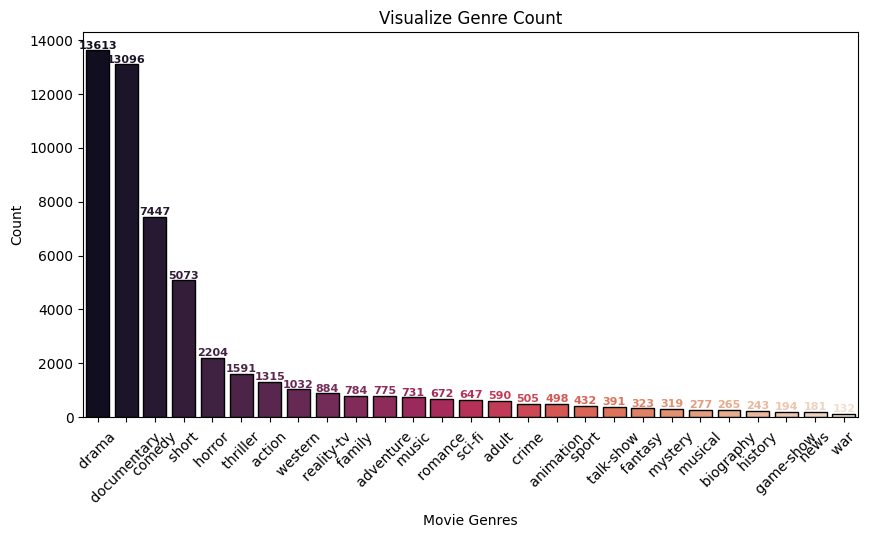

In [63]:
data = pd.read_csv('train_data.txt', sep=':::', names=['ID','Title','Genre','Description'], engine='python')
plt.figure(figsize=(10,5))
my_plot=sns.countplot(x='Genre',data=data,order= data['Genre'].value_counts().index,palette='rocket',edgecolor=(0,0,0))
my_plot.set_xticklabels(my_plot.get_xticklabels(), rotation=45)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Visualize Genre Count')


for idx, value in enumerate(data['Genre'].value_counts()):
    my_plot.text(idx, value + 0.1, str(value), ha='center', va='bottom', fontsize=8, color=my_plot.patches[idx].get_facecolor(), weight='bold')

plt.show()


*Drama is the most frequent genre in our dataset.*

*For our data to be perfect we should have more data available so that they could be balanced. This means that all the genres should be equally represented in our dataset. This is not the case so we will see if this causes trouble in the next steps.*

Checking our data shape and if we have any missing values.

In [64]:
#Shape of our DataFrame
shape=data.shape
print(shape)
#Missing Values
print(data.info())

(54214, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   Title        54214 non-null  object
 2   Genre        54214 non-null  object
 3   Description  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB
None


*The data have no missing values, so we are good to go.*


Turning the Genres from Categorical into Numerical Values.

In [65]:
#data['Genre'] = data['Genre'].astype('category')
#data['Genre'] = data['Genre'].cat.codes

data['Genre_Code'] = data['Genre'].astype('category').cat.codes + 1

genre_mapping = dict(enumerate(data['Genre'].astype('category').cat.categories, start=1))
print("Genre Mapping:")
for code, genre in genre_mapping.items():
    print(f"{genre}: {code}")

print("\nUpdated DataFrame:")
print(data.head())

Genre Mapping:
 action : 1
 adult : 2
 adventure : 3
 animation : 4
 biography : 5
 comedy : 6
 crime : 7
 documentary : 8
 drama : 9
 family : 10
 fantasy : 11
 game-show : 12
 history : 13
 horror : 14
 music : 15
 musical : 16
 mystery : 17
 news : 18
 reality-tv : 19
 romance : 20
 sci-fi : 21
 short : 22
 sport : 23
 talk-show : 24
 thriller : 25
 war : 26
 western : 27

Updated DataFrame:
   ID                               Title       Genre  \
0   1       Oscar et la dame rose (2009)       drama    
1   2                       Cupid (1997)    thriller    
2   3   Young, Wild and Wonderful (1980)       adult    
3   4              The Secret Sin (1915)       drama    
4   5             The Unrecovered (2007)       drama    

                                         Description  Genre_Code  
0   Listening in to a conversation between his do...           9  
1   A brother and sister with a past incestuous r...          25  
2   As the bus empties the students for their fie...      

Removing Special Characters & Punctuations from the Descriptions and convert the text to lower case. Moving on with tokenizing, removing stop words and lemmatization.

In [66]:
descriptions = list(data['Description'])
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
#Creating a set of stop words
stop_words=set(stopwords.words('english'))
def remove_stop_words(sentence):
  filtered_words=[s for s in sentence if s not in stop_words]
  return filtered_words

for i in range(len(descriptions)):
    descriptions[i] = re.sub(r'[^\w\s]', '', descriptions[i]) # removing puntuations
    descriptions[i]=descriptions[i].lower() #convert text in lower case
    descriptions[i]=nltk.word_tokenize(descriptions[i]) #tokenizing
    descriptions[i]=remove_stop_words(descriptions[i]) #removing stop words
    descriptions[i]=[WordNetLemmatizer().lemmatize(word) for word in descriptions[i]] #lemmatization
    descriptions[i]=' '.join(descriptions[i])



print(descriptions[:3])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['listening conversation doctor parent 10yearold oscar learns nobody courage tell week live furious refuse speak anyone except straighttalking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue', 'brother sister past incestuous relationship current murderous relationship murder woman reject murder woman get close', 'bus empty student field trip museum natural history little tour guide suspect student another tour first lecture film coeds drift dream erotic fantasy one imagine film release emotion fantasy erotic uncommon way one slip curator office little acquisition another find anthropologist see bone identified even head teacher isnt immune soon tour bus departs everyone admits quite education']


Replacing the Description column with the fixed column that we created.

In [67]:
Descriptions=pd.DataFrame(descriptions)
data['Description'] = Descriptions[0].values
data.head()


,ID,Title,Genre,Description,Genre_Code
0,1,Oscar et la dame rose (2009),drama,listening conversation doctor parent 10yearold...,9
1,2,Cupid (1997),thriller,brother sister past incestuous relationship cu...,25
2,3,"Young, Wild and Wonderful (1980)",adult,bus empty student field trip museum natural hi...,2
3,4,The Secret Sin (1915),drama,help unemployed father make end meet edith twi...,9
4,5,The Unrecovered (2007),drama,film title refers unrecovered body ground zero...,9


Creating a word cloud of the most commonly used terms for drama which is the most frequent movie genre in our dataset.

['listening conversation doctor parent 10yearold oscar learns nobody courage tell week live furious refuse speak anyone except straighttalking rose lady pink meet hospital stair christmas approach rose us fantastical experience professional wrestler imagination wit charm allow oscar live life love full company friend pop corn einstein bacon childhood sweetheart peggy blue', 'help unemployed father make end meet edith twin sister grace work seamstress invalid grace fall prey temptation chinatown opium becomes addict condition worsened misguided physician prescribes morphine ease pain father strike oil family enjoys new prosperity sister meet eligible jack herron fellow oil prospector grace shock jack fall love edith jealousy grace tell jack edith drug problem hinting sister soon need morphine grace arranges dinner chinatown couple sister jack dance grace slip away opium den edith follows end wrong den arrested ensuing drug raid bail jail edith take angry jack search grace stumble across

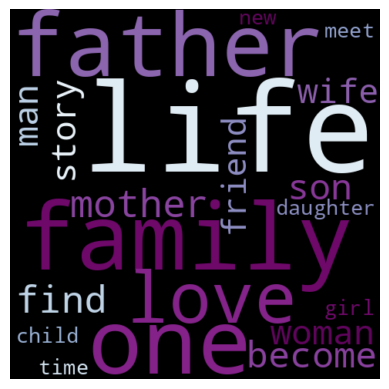

In [81]:
#Creating a list with the description of all the drama movies. No. 9 of Genre_Code corresponds to "Drama" according to the mapping we did some steps before.
drama_desc=[]
for i,j in data.iterrows():
  if j['Genre_Code']==9:
    drama_desc.append(j['Description'])

print(drama_desc[:3])
drama_desc=' '.join(drama_desc) #coverting the list to text in order to be read by the wordcloud below.
wordcloud = WordCloud(width=480, height=480, margin=0,max_words=20,colormap='BuPu').generate(drama_desc)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

